In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [166]:
df = pd.read_csv("startup.csv")
test1 = df.copy()

# 1


City where most number of funding is done among Bangalore, Mumbai and NCR is  Bangalore .


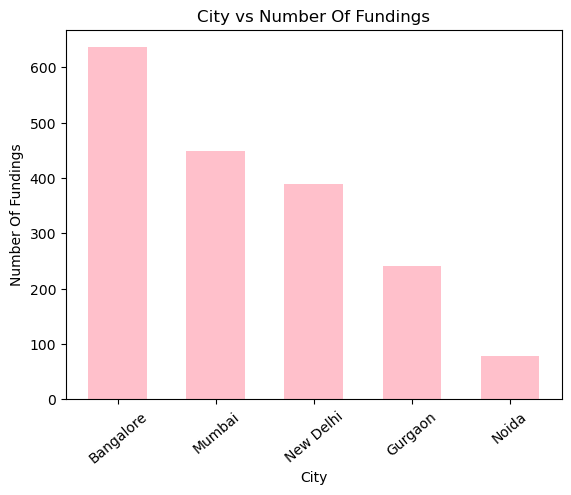

,Name Of City,Number Of Fundings
0,Bangalore,636
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79


In [167]:
test1.dropna(subset =['CityLocation'] , inplace = True)
test1.reset_index(drop = True , inplace = True)
# Clean and preprocess the data
def ind_city(city):
    return city.split('/')[0].strip()

test1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
test1['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
test1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)
test1['CityLocation'] = test1['CityLocation'].apply(ind_city)
test1=test1[(test1['CityLocation']=="Mumbai")|(test1['CityLocation']=="Bangalore")|(test1['CityLocation']=="Gurgaon")|(test1['CityLocation']=="New Delhi")|(test1['CityLocation']=="Noida")]
#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()
city = temp.index
No_Of_Funding = temp.values



# Plot a bar graph
print("City where most number of funding is done among Bangalore, Mumbai and NCR is ",city[0],".")

plt.bar(city,No_Of_Funding,color='Pink',width=0.6)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()
# accepts iterable items and merges them into a single tuple
li = list(zip(city, No_Of_Funding))
ff=pd.DataFrame(li,columns=["Name Of City", "Number Of Fundings"])
ff

# 2

In [180]:
test2 = df.copy()
test2.dropna(subset = ['InvestorsName'] , inplace = True)

#to replace the undisclosd

test2['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test2['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)
test2.reset_index(drop = True ,inplace = True)




In [181]:
#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i and i != "":
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                if j != "":
                    d[j.strip()] = d.get(j.strip(), 0) + 1
                
    return d
dictionary = build_dict(test2['InvestorsName'])

#build pandas dataframe of investors name and its number of investments
invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))
#sort the values in descending order 
invest = invest.sort_values(by = [0], ascending = False)
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times
for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i])

In [182]:
print("The top 5 investor who have max. number of times :")
for ele in x:
    print(ele)

The top 5 investor who have max. number of times :
Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


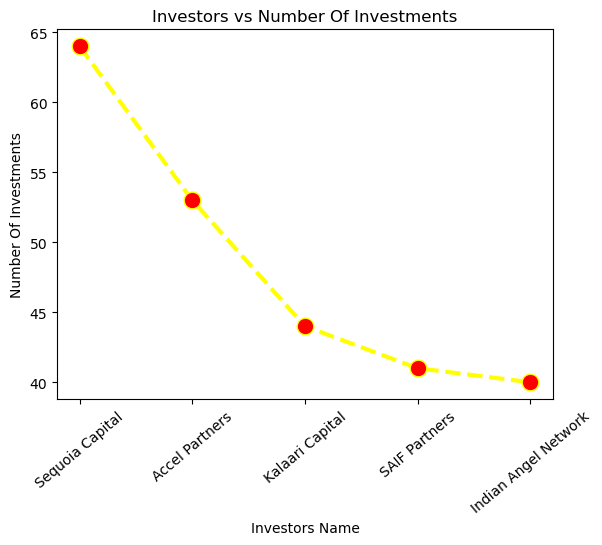

In [183]:
plt.plot(x,y,color='yellow',linestyle='--', linewidth = 3, marker='o', markerfacecolor='red', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()

In [184]:
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "NO. OF INVESTMENT"])
investor_data

,Name Of Investors,NO. OF INVESTMENT
0,Sequoia Capital,[64]
1,Accel Partners,[53]
2,Kalaari Capital,[44]
3,SAIF Partners,[41]
4,Indian Angel Network,[40]


# 3

In [139]:
test3 = df.copy()


In [185]:
#to replace error in list of investor name and startup name

test3['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test3['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

test3['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
test3['StartupName'].replace('Ola Cabs','Ola',inplace=True)
test3['StartupName'].replace('Olacabs','Ola',inplace=True)
test3['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
test3['StartupName'].replace('Oyorooms','Oyo',inplace=True)
test3['StartupName'].replace('OYORooms','Oyo',inplace=True)
test3['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

In [186]:
test3.dropna(subset =['InvestorsName' ,'StartupName'] , inplace = True)
test3.reset_index(drop = True , inplace=True)

In [187]:
def create(startup_name , investor_name):
    cnt={}  #investor name as key and no of investor as values
    name_startup= {} #investor name as key and no of different companies as value
    
    n = len(investor_name)
    for idx in range(n):
        i = investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None : #no startup funded by the incestor
                cnt[i]=1
                li=[]
                li.append(name)
                name_startup[i]=li
            else:
                li = name_startup[i]
                if name not in li:
                    cnt[i]= cnt.get(i,0)+1
                    li.append(name)
                    name_startup[i]
        else:
            #splitting the investor name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k!= "":
                    if name_startup.get(k) is None:
                        cnt[k]=1
                        li =[]
                        li.append(name)
                        name_startup[k]=li
                    else:
                        li=name_startup[k]
                        if name not in li:
                            cnt[k] =cnt.get(k,0)+1
                            li.append(name)
                            name_startup[k] = li
    return cnt

dictionary = create(test3['StartupName'] , test3['InvestorsName'])

                            

In [188]:
diff_invest = pd.DataFrame(list(dictionary.values()) , list(dictionary.keys()))
diff_invest = diff_invest.sort_values(by=[0] ,ascending = False)

In [189]:
x=[]
y=[]

for i in range(5):
    x.append(diff_invest.index[i])
    y.append(diff_invest.values[i][0])

print("List of top 5 investor which are invest most no. of time : ")

for ele in x:
    print(ele)

List of top 5 investor which are invest most no. of time : 
Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


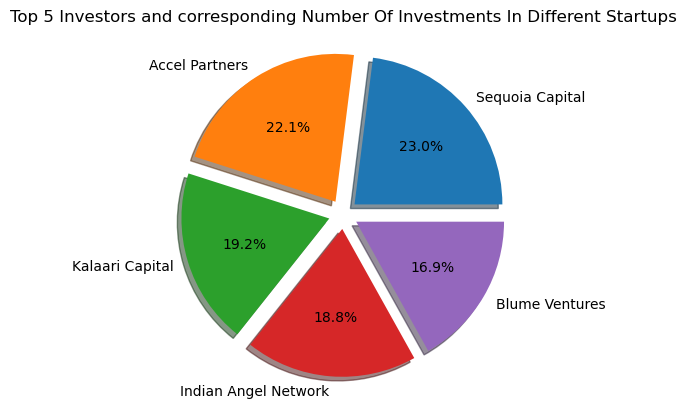

In [190]:
plt.pie(y, labels=x ,shadow=True,explode=(0.1,0.1,0.1,0.1,0.1),autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.show()

In [191]:
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Private Equity"])
investor_data

,Name Of Investors,Total Number Of Investments of type Private Equity
0,Sequoia Capital,49
1,Accel Partners,47
2,Kalaari Capital,41
3,Indian Angel Network,40
4,Blume Ventures,36


# 4

In [192]:
test4 = df.copy()

In [193]:
#to replace error in list of investor name and startup name

test4['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test4['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

test4['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
test4['StartupName'].replace('Ola Cabs','Ola',inplace=True)
test4['StartupName'].replace('Olacabs','Ola',inplace=True)
test4['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
test4['StartupName'].replace('Oyorooms','Oyo',inplace=True)
test4['StartupName'].replace('OYORooms','Oyo',inplace=True)
test4['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

test4['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
test4['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
test4['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
test4['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)

In [194]:
test4.dropna(subset = ['InvestorsName' , 'StartupName' , 'InvestmentType'] , inplace = True)
test4.reset_index(drop = True , inplace = True)

In [195]:
def create(startup_name , investor_name , invest_type , investment_type):
    cnt={}  #investor name as key and no of investor as values
    name_startup= {} #investor name as key and no of different companies as value
    
    n = len(investor_name)
    for idx in range(n):
        type_of_invest = invest_type[idx].strip()
        if type_of_invest not in investment_type:
            continue
        
        i = investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None : #no startup funded by the incestor
                cnt[i]=1
                li=[]
                li.append(name)
                name_startup[i]=li
            else:
                li = name_startup[i]
                if name not in li:
                    cnt[i]= cnt.get(i,0)+1
                    li.append(name)
                    name_startup[i]
        else:
            #splitting the investor name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k!= "":
                    if name_startup.get(k) is None:
                        cnt[k]=1
                        li =[]
                        li.append(name)
                        name_startup[k]=li
                    else:
                        li=name_startup[k]
                        if name not in li:
                            cnt[k] =cnt.get(k,0)+1
                            li.append(name)
                            name_startup[k] = li
    return cnt

dictionary = create(test4['StartupName'], test4['InvestorsName'], test4['InvestmentType'], ["Crowd Funding", "Seed Funding"])


In [196]:
diff_invest = pd.DataFrame(list(dictionary.values()) , list(dictionary.keys()))
diff_invest = diff_invest.sort_values(by=[0] ,ascending = False)

In [197]:
x=[]
y=[]

for i in range(5):
    x.append(diff_invest.index[i])
    y.append(diff_invest.values[i][0])

print("List of top 5 investor which are invest most no. of time : ")

for ele in x:
    print(ele)

List of top 5 investor which are invest most no. of time : 
Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Group of Angel Investors


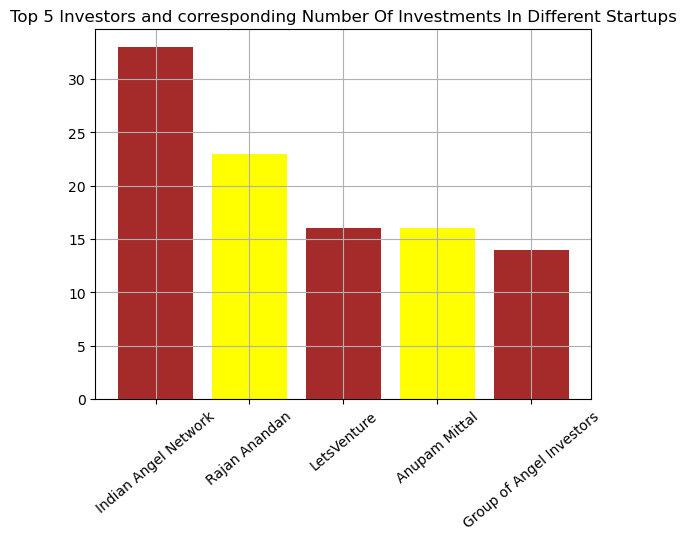

In [198]:
plt.bar(x,y , color=['brown' ,'yellow'])
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.show()

In [199]:
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Private Equity"])
investor_data

,Name Of Investors,Total Number Of Investments of type Private Equity
0,Indian Angel Network,33
1,Rajan Anandan,23
2,LetsVenture,16
3,Anupam Mittal,16
4,Group of Angel Investors,14


# 5

In [200]:
test5 = df.copy()

In [201]:
#to replace error in list of investor name and startup name

test5['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test5['InvestorsName'].replace("Undisclosed Investors", "", inplace = True)

test5['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
test5['StartupName'].replace('Ola Cabs','Ola',inplace=True)
test5['StartupName'].replace('Olacabs','Ola',inplace=True)
test5['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
test5['StartupName'].replace('Oyorooms','Oyo',inplace=True)
test5['StartupName'].replace('OYORooms','Oyo',inplace=True)
test5['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

test5['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
test5['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
test5['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
test5['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)

In [202]:
test5.dropna(subset = ['InvestorsName' , 'StartupName' , 'InvestmentType'] , inplace = True)
test5.reset_index(drop = True , inplace = True)

In [203]:
def create(startup_name , investor_name , invest_type , investment_type):
    cnt={}  #investor name as key and no of investor as values
    name_startup= {} #investor name as key and no of different companies as value
    
    n = len(investor_name)
    for idx in range(n):
        type_of_invest = invest_type[idx].strip()
        if type_of_invest not in investment_type:
            continue
        
        i = investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None : #no startup funded by the incestor
                cnt[i]=1
                li=[]
                li.append(name)
                name_startup[i]=li
            else:
                li = name_startup[i]
                if name not in li:
                    cnt[i]= cnt.get(i,0)+1
                    li.append(name)
                    name_startup[i]
        else:
            #splitting the investor name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k!= "":
                    if name_startup.get(k) is None:
                        cnt[k]=1
                        li =[]
                        li.append(name)
                        name_startup[k]=li
                    else:
                        li=name_startup[k]
                        if name not in li:
                            cnt[k] =cnt.get(k,0)+1
                            li.append(name)
                            name_startup[k] = li
    return cnt

dictionary = create(test5['StartupName'], test5['InvestorsName'], test5['InvestmentType'], ["Private Equity"])


In [204]:
diff_invest = pd.DataFrame(list(dictionary.values()) , list(dictionary.keys()))
diff_invest = diff_invest.sort_values(by=[0] ,ascending = False)

In [205]:
x=[]
y=[]

for i in range(5):
    x.append(diff_invest.index[i])
    y.append(diff_invest.values[i][0])

print("List of top 5 investor which are invest most no. of time : ")

for ele in x:
    print(ele)

List of top 5 investor which are invest most no. of time : 
Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners


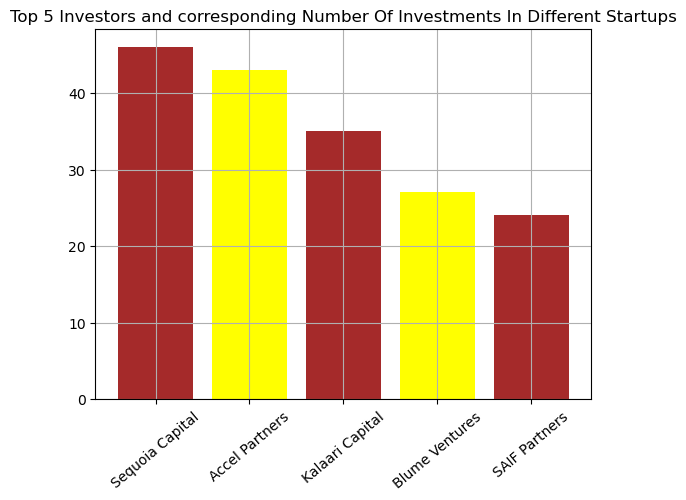

In [206]:
plt.bar(x,y , color=['brown' ,'yellow'])
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.show()

In [207]:
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments of type Private Equity"])
investor_data

,Name Of Investors,Total Number Of Investments of type Private Equity
0,Sequoia Capital,46
1,Accel Partners,43
2,Kalaari Capital,35
3,Blume Ventures,27
4,SAIF Partners,24
